# Importing Packages

In [1]:
import pandas as pd
from transformers import pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import gensim
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import spacy
import matplotlib.pyplot as plt
from functools import reduce
import nltk
from wordcloud import WordCloud
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
import warnings
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Iheb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Iheb\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Iheb\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Importing our datasets

In [2]:
df1 = pd.read_csv('./data_cv/jobseekers.csv') 
df2 = pd.read_csv('./data_cv/pfe.csv')
df1.head() 

,headline,fullName,jobTitle,jobTitle2,schoolDegree,allSkills,schoolDegree2
0,has studied at the private high school of engi...,Montassar Fenina,nan nan nan nan nan nan nan nan nan nan nan na...,nanny nanny nanny nanny nanny nanny nanny nann...,"Diplôme d'ingénieur, Ingénierie électromécanique","Arduino IDE, AutoCAD, Génie mécanique, Microso...","mécanique , construction fabrication mécanique"
1,junior data scientist at value,Med Amine Konyali,Data Scientist,Data Engineering & Data science developer,"Diplôme d'ingénieur, Data Science","Java, PL/SQL, .NET framework, Apprentissage au...",Licence
2,chief industrial project,Oussama Bougaalech,Industrial Project Leader,System Quality Engineer,"Diplôme d'ingénieur, Ingénierie électromécanique","Gestion de la qualité, Anglais, Français, Plan...","Licence appliquée en Génie Electrique, Electri..."
3,Head of Team R&D for Electric Vehicles in the ...,Taoufik Chaouachi,Chief R&D Team Electric Vehicle,Senior Embedded Engineer,"Thèse de doctorat, Véhicule électrique","SCADA, Instrumentation, image processing, Robo...","Diplôme d'ingénieur, Ingénierie électromécanique"
4,full stack developer at private high school of...,Oussama Mhamdi,Full-stack developer,𝐃𝐞́𝐯𝐞𝐥𝐨𝐩𝐩𝐞𝐮𝐫 𝐰𝐞𝐛,"Diplôme d'ingénieur, Informatique","React.js, Golang, Firebase, Node.js, React, Mo...","licence, Informatique"


In [3]:
df2.head()

,Unnamed: 0,headline,fullName,jobTitle,jobTitle2,schoolDegree,allSkills,schoolDegree2
0,0,student at the private university of engineeri...,Tasnim Naji,Trainee,Trainee,"Diplôme d'ingénieur, Ingénierie des télécommun...","VMware, Microservices, Packet Tracer, Logiciel...","Licence, télécommunications"
1,1,student at the private engineering and technol...,Oussama Lachiheb,Summer Internship,Trainee,"Diplôme d'ingénieur, Informatique","Angular, Spring Boot, PHP, MySQL, Doctrine (PH...","2, genie mecanique"
2,2,private engineering and technology university ...,berzouga siwar,Student,nan nan nan nan nan nan nan nan nan nan nan na...,NaN,"Microsoft Word, SOLIDWORKS, Java, Spring Boot,...","technicien supérieur en génie électrique, élec..."
3,3,software engineering student at esprit,Rim Kourou,Software Engineer Intern,nan nan nan nan nan nan nan nan nan nan nan na...,"Engineer's degree, Business Intelligence","Microsoft Power Platform, SharePoint, Communic...","Fundamental degree in computer science, Comput..."
4,4,looking for a pfe internship | student at the ...,Majdi Msallem,Web developer,Web developer,"Diplôme d'ingénieur, Ingénierie informatique","Laravel, Symfony, Feuilles de style en cascade...",STIC - Sciences et Technologies de l'Informati...


In [4]:
df2.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df2.shape

(493, 7)

In [6]:
df1.shape

(815, 7)

# Concatenate datasets


In [7]:
df = pd.concat([df1, df2], axis=0).reset_index(drop=True)

In [8]:
df.head()

,headline,fullName,jobTitle,jobTitle2,schoolDegree,allSkills,schoolDegree2
0,has studied at the private high school of engi...,Montassar Fenina,nan nan nan nan nan nan nan nan nan nan nan na...,nanny nanny nanny nanny nanny nanny nanny nann...,"Diplôme d'ingénieur, Ingénierie électromécanique","Arduino IDE, AutoCAD, Génie mécanique, Microso...","mécanique , construction fabrication mécanique"
1,junior data scientist at value,Med Amine Konyali,Data Scientist,Data Engineering & Data science developer,"Diplôme d'ingénieur, Data Science","Java, PL/SQL, .NET framework, Apprentissage au...",Licence
2,chief industrial project,Oussama Bougaalech,Industrial Project Leader,System Quality Engineer,"Diplôme d'ingénieur, Ingénierie électromécanique","Gestion de la qualité, Anglais, Français, Plan...","Licence appliquée en Génie Electrique, Electri..."
3,Head of Team R&D for Electric Vehicles in the ...,Taoufik Chaouachi,Chief R&D Team Electric Vehicle,Senior Embedded Engineer,"Thèse de doctorat, Véhicule électrique","SCADA, Instrumentation, image processing, Robo...","Diplôme d'ingénieur, Ingénierie électromécanique"
4,full stack developer at private high school of...,Oussama Mhamdi,Full-stack developer,𝐃𝐞́𝐯𝐞𝐥𝐨𝐩𝐩𝐞𝐮𝐫 𝐰𝐞𝐛,"Diplôme d'ingénieur, Informatique","React.js, Golang, Firebase, Node.js, React, Mo...","licence, Informatique"


In [9]:
df.shape

(1308, 7)

# Translate method

In [10]:
# Create a pipeline for machine translation from French to english
translator = pipeline("translation_fr_to_en", model="Helsinki-NLP/opus-mt-fr-en")

# Define a function to translate a string to French
def translate_to_english(text):
    try:
        # Translate the input text to French
        translation = translator(text, max_length=512)
        return translation[0]["translation_text"]
    except:
        # If there's an error with the translation, return the original text
        return text

In [11]:
df.headline[0]

'has studied at the private high school of engineering and technology (mind)'

## Translate headline

In [12]:
trans_ = []
for i in range(len(df.headline)):
    trans_.append(translate_to_english(df.headline[i]))

In [13]:
df['headline'] = trans_

## Translate School Degree

In [14]:
trans_schoolDegree = []
for i in range(len(df.schoolDegree)):
    trans_schoolDegree.append(translate_to_english(df.schoolDegree[i]))

In [15]:
df['schoolDegree'] = trans_schoolDegree

In [16]:
trans_schoolDegree2 = []
for i in range(len(df.schoolDegree2)):
    trans_schoolDegree2.append(translate_to_english(df.schoolDegree2[i]))

In [17]:
df['schoolDegree2'] = trans_schoolDegree2

In [18]:
trans_

['has studied at the private high school of engineering and technology (mind)',
 'junior data scientist at value',
 'chief industrial project',
 'Head of Team R&D for Electric Vehicles in the Mind (Private School of Engineering and Technology)',
 'full stack developer at private high school of engineering and technology - spirit',
 'I am currently in the third year of the computer engineering cycle at the private high school of engineering and technology - mind',
 'trained engineer in mind-set systems (private engineering and technology college)',
 'trainee software development embarked, sagemcom',
 'Rpa developer passionate about machine learning and process robotization',
 'Network and Telecommunications Engineer',
 'computer engineer specializing in computer and mobile systems',
 'test and validation engineer',
 'responsible for projects Department of Civil Engineering in the Mind (Private School of Engineering and Technology)',
 'Electrical Mechanical Engineer',
 'computer science 

In [19]:
trans_schoolDegree

['Diploma in Engineering, Electromechanical Engineering',
 'Diploma in Engineering, Data Science',
 'Diploma in Engineering, Electromechanical Engineering',
 'Ph.D. Thesis, Electric Vehicle',
 'Diploma in Engineering, Computer Science',
 'Engineering, Computer Science',
 'Doctor , Film, Audiovisual, Art Technology and Artistic Mediation Sciences',
 'Diploma in Engineering, Computer Science',
 "Master's degree, Computer Software Engineering",
 'Diploma in Engineering, Networking of Computer Systems and Telecommunications',
 'Diploma in Computer Engineering, Computer Systems and Mobiles',
 'Computer Engineer, Computer Engineering',
 'National Diploma of Engineer',
 'Diploma in Engineering, Electromechanical Engineering',
 'Diploma in Engineering, Computer Engineering',
 'Diploma of Engineering in Electromechanical Engineering, Organization and Industrial Management',
 'National Diploma of Engineer in Electromechanics, Electromechanics',
 'Diploma in Engineering, Computer Science',
 'Nati

In [20]:
trans_schoolDegree2

['mechanical , mechanical manufacturing',
 'Licence',
 "Applied Bachelor's degree in Electrical Engineering, Industrial Electricity",
 'Diploma in Engineering, Electromechanical Engineering',
 'license, Computers',
 'Quality management and control, Quality control and safety technologies / technicians',
 'National Diploma of Engineer, Electromechanical Engineering',
 "Bachelor's degree in electromechanical",
 "Bachelor's degree, Mechanical Engineering",
 'Applied licence in telecommunications and electronics , Telecom and Electronics',
 'Applied license, electromechanical',
 "Professional Master's, Information System Engineering and Software",
 'MPI',
 'License, Electrical Engineering, Electronics and Communications Technology/Technology',
 'License Applied, Electromechanical : Industrial Maintenance',
 "Bachelor's degree in Mechanical Engineering, Industrial Mechanics and Maintenance Technology",
 'Fundamental License in Industrial Systems Management , Production Management',
 'Profes

#### Make a copy of dataframe

In [21]:
data = df.copy()

# Cleaning Text


1.   Removing special characters
2.   Remove punctuation
3.   Convert to lowercase
4.   Remove stop words
5.   Tokenization
6.   Lemitazation 

In [22]:
def clean_text(text):
    text = str(text)
    # Remove special characters
    text = text.replace('\n', ' ').replace('\r', '').replace('\t', ' ')
    text = text.encode('ascii', 'ignore').decode('utf-8')
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation.replace("-", "-")))
    text = text.replace('[', '')
    text = text.replace(']', '')
    # Convert to lowercase
    text = text.lower()    
    words = text.split()
    stop_words = set(stopwords.words('english'))
    extra_stopwords = ['framework', 'langage', 'programmation',"de","et","technology", 'programming', 'language']
    stop_words.update(extra_stopwords)
    words = [word for word in words if word not in stop_words]
    # Join the cleaned words in a string
    text = ' '.join(words)
    
    
    # Split the text into a list of individual phrases
    phrases = text.split(',')

    # Count the occurrences of each phrase using a dictionary
    phrase_counts = {}
    for phrase in phrases:
        if phrase in phrase_counts:
            phrase_counts[phrase] += 1
        else:
            phrase_counts[phrase] = 1

    # Join only the unique phrases together
    unique_phrases = [phrase for phrase in phrases if phrase_counts[phrase] == 1]
    clean_text = ','.join(unique_phrases)
    if clean_text != "":
        text = clean_text
    return text

### Applying clean_text method 

In [23]:
data['headline'] = data['headline'].apply(clean_text)
data['schoolDegree'] = data['schoolDegree'].apply(clean_text)
data['schoolDegree2'] = data['schoolDegree2'].apply(clean_text)
data['allSkills'] = data['allSkills'].apply(clean_text)

### Counting missing values

In [24]:
#chech the data for missing values
missing_value_cnt = data.isnull().sum()
missing_value_cnt
percentage=((data.isna().sum()*100/data.shape[0]))
data_types = data.dtypes
data_types
missing_values_table = pd.concat([missing_value_cnt, percentage, data_types], axis=1)
missing_values_table = missing_values_table.rename(columns = {0 : 'Missing Values', 

                                                       1 : 'Percentage',
                                                       2 : 'Data Types'})
missing_values_table

,Missing Values,Percentage,Data Types
headline,0,0.0,object
fullName,0,0.0,object
jobTitle,0,0.0,object
jobTitle2,0,0.0,object
schoolDegree,0,0.0,object
allSkills,0,0.0,object
schoolDegree2,0,0.0,object


### Convert all Skills to string and lowercase

In [25]:
# Convert all strings in the Series to lowercase
data['allSkills'] = data['allSkills'].astype(str)
data['allSkills'] = data['allSkills'].apply(lambda x: x.lower())

In [26]:
data.head()

,headline,fullName,jobTitle,jobTitle2,schoolDegree,allSkills,schoolDegree2
0,studied private high school engineering mind,Montassar Fenina,nan nan nan nan nan nan nan nan nan nan nan na...,nanny nanny nanny nanny nanny nanny nanny nann...,diploma engineering electromechanical engineering,arduino ide autocad gnie mcanique microsoft wo...,mechanical mechanical manufacturing
1,junior data scientist value,Med Amine Konyali,Data Scientist,Data Engineering & Data science developer,diploma engineering data science,java plsql net apprentissage automatique sprin...,licence
2,chief industrial project,Oussama Bougaalech,Industrial Project Leader,System Quality Engineer,diploma engineering electromechanical engineering,gestion la qualit anglais franais planificatio...,applied bachelors degree electrical engineerin...
3,head team rd electric vehicles mind private sc...,Taoufik Chaouachi,Chief R&D Team Electric Vehicle,Senior Embedded Engineer,phd thesis electric vehicle,scada instrumentation image processing robotic...,diploma engineering electromechanical engineering
4,full stack developer private high school engin...,Oussama Mhamdi,Full-stack developer,𝐃𝐞́𝐯𝐞𝐥𝐨𝐩𝐩𝐞𝐮𝐫 𝐰𝐞𝐛,diploma engineering computer science,reactjs golang firebase nodejs react mongodb a...,license computers


In [27]:
data['jobTitle2'][4] = 'Web Developer'

### Replace nan sequence with NaN

In [28]:
# Define a function to replace sequences of "nan" with NaN in a string
def replace_nan(s):
    substrings = s.split()
    filtered_substrings = [s for s in substrings if s != "nan"]
    filtered_substrings = [s for s in filtered_substrings if s != "nanny"]
    result = " ".join(filtered_substrings)
    if not result:
        result = np.nan    
    return result

# Apply the function to column 'jobTitle' of the DataFrame
data['jobTitle'] = data['jobTitle'].apply(replace_nan)

In [29]:
data.head()

,headline,fullName,jobTitle,jobTitle2,schoolDegree,allSkills,schoolDegree2
0,studied private high school engineering mind,Montassar Fenina,NaN,nanny nanny nanny nanny nanny nanny nanny nann...,diploma engineering electromechanical engineering,arduino ide autocad gnie mcanique microsoft wo...,mechanical mechanical manufacturing
1,junior data scientist value,Med Amine Konyali,Data Scientist,Data Engineering & Data science developer,diploma engineering data science,java plsql net apprentissage automatique sprin...,licence
2,chief industrial project,Oussama Bougaalech,Industrial Project Leader,System Quality Engineer,diploma engineering electromechanical engineering,gestion la qualit anglais franais planificatio...,applied bachelors degree electrical engineerin...
3,head team rd electric vehicles mind private sc...,Taoufik Chaouachi,Chief R&D Team Electric Vehicle,Senior Embedded Engineer,phd thesis electric vehicle,scada instrumentation image processing robotic...,diploma engineering electromechanical engineering
4,full stack developer private high school engin...,Oussama Mhamdi,Full-stack developer,Web Developer,diploma engineering computer science,reactjs golang firebase nodejs react mongodb a...,license computers


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   headline       1308 non-null   object
 1   fullName       1308 non-null   object
 2   jobTitle       1235 non-null   object
 3   jobTitle2      1308 non-null   object
 4   schoolDegree   1308 non-null   object
 5   allSkills      1308 non-null   object
 6   schoolDegree2  1308 non-null   object
dtypes: object(7)
memory usage: 71.7+ KB


### Replace jobTitle nan value based on schoolDegree

In [31]:
# create a sample DataFrame
df = pd.DataFrame(data)

from sklearn.preprocessing import LabelEncoder

# encode the schoolDegree feature using label encoding
le = LabelEncoder()
df['schoolDegree_encoded'] = le.fit_transform(df['schoolDegree'].astype(str))

# split the data into training and test sets
X_train = df.loc[df['jobTitle'].notnull(), 'schoolDegree_encoded'].values.reshape(-1, 1)
y_train = df.loc[df['jobTitle'].notnull(), 'jobTitle'].values.ravel()

# train a random forest classifier on the training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# use the model to predict the missing job titles
X_pred = df.loc[df['jobTitle'].isnull(), 'schoolDegree_encoded'].values.reshape(-1, 1)
if len(X_pred) > 0:
    y_pred = clf.predict(X_pred)

    # fill in the missing job titles with the predicted values
    df.loc[df['jobTitle'].isnull(), 'jobTitle'] = y_pred
    df.drop('schoolDegree_encoded', axis=1, inplace=True)

else:
    print("No missing job titles found in the DataFrame.")
    df.drop('schoolDegree_encoded', axis=1, inplace=True)

df['jobTitle2'].fillna(df['jobTitle'], inplace=True)

In [32]:
df.head()

,headline,fullName,jobTitle,jobTitle2,schoolDegree,allSkills,schoolDegree2
0,studied private high school engineering mind,Montassar Fenina,Student,nanny nanny nanny nanny nanny nanny nanny nann...,diploma engineering electromechanical engineering,arduino ide autocad gnie mcanique microsoft wo...,mechanical mechanical manufacturing
1,junior data scientist value,Med Amine Konyali,Data Scientist,Data Engineering & Data science developer,diploma engineering data science,java plsql net apprentissage automatique sprin...,licence
2,chief industrial project,Oussama Bougaalech,Industrial Project Leader,System Quality Engineer,diploma engineering electromechanical engineering,gestion la qualit anglais franais planificatio...,applied bachelors degree electrical engineerin...
3,head team rd electric vehicles mind private sc...,Taoufik Chaouachi,Chief R&D Team Electric Vehicle,Senior Embedded Engineer,phd thesis electric vehicle,scada instrumentation image processing robotic...,diploma engineering electromechanical engineering
4,full stack developer private high school engin...,Oussama Mhamdi,Full-stack developer,Web Developer,diploma engineering computer science,reactjs golang firebase nodejs react mongodb a...,license computers


## Tokenization

In [33]:
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text)
#skills column
tokens_skill = df['allSkills'].astype(str).apply(tokenize_text)
#engineer type column
tokens_jobTitle = df['jobTitle'].astype(str).apply(tokenize_text)

In [34]:
tokens_skill

0       [arduino, ide, autocad, gnie, mcanique, micros...
1       [java, plsql, net, apprentissage, automatique,...
2       [gestion, la, qualit, anglais, franais, planif...
3       [scada, instrumentation, image, processing, ro...
4       [reactjs, golang, firebase, nodejs, react, mon...
                              ...                        
1303    [gestion, projet, dbeaver, travail, dquipe, sc...
1304                                                [nan]
1305    [dveloppement, web, dveloppement, fullstack, d...
1306    [react, aspnet, microsoft, sql, server, angula...
1307                                                [nan]
Name: allSkills, Length: 1308, dtype: object

# Stemming

In [35]:
tokens_skill = df['allSkills'].to_list()

In [36]:
# Import the SnowballStemmer to perform stemming
from nltk.stem.snowball import SnowballStemmer
# Create an English language SnowballStemmer object
stemmer = SnowballStemmer("english")
stemmed_words = []
for i in range(len(tokens_skill)):
    word = stemmer.stem(tokens_skill[i])
    stemmed_words.append(word)


# Print the stemmed_words to observe words after stemming
print("After stemming:   ", stemmed_words)

After stemming:    ['arduino ide autocad gnie mcanique microsoft word solidworks microsoft powerpoint travail dquip', 'java plsql net apprentissage automatique spring boot modlisation unifi uml r symfony symfony python junit maven', 'gestion la qualit anglais franais planification projets gestion budgtaire surveillance du budget planification budgtisation prvision contrle du budget analyse donnes amlioration des processus analyse des exigences mthodes agiles amlioration continue systme qualit gestion des risques audit ingnierie esprit dquipe comptences analytiques formation diversit intgration gestion projet gestion la production gestion des approvisionnements microsoft excel hirarchiser la charge travail rsolution problmes leadership communication manag', 'scada instrumentation image processing robotics automation automation control piping instrumentation diagram schma tuyauterie instrumentation industrial networking compteur intelligent remote terminal unit ingnierie matlab superviso

In [37]:
df['allSkills'] = stemmed_words

## **WordCloud for most frequent Skills**


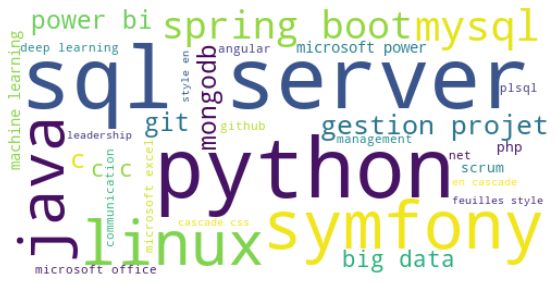

#The most important technologies are:

SQL SERVER --> 100%
PYTHON --> 91%
SYMFONY --> 87%
JAVA --> 73%
LINUX --> 73%
MYSQL --> 65%
SPRING BOOT --> 59%
GESTION PROJET --> 53%
C --> 50%
POWER BI --> 47%


'skills where candidate are most competent based on our resumes'

In [38]:
unique_technologies = pd.Series(np.array(tokens_skill).flatten()).unique()
technologies = " ".join(unique_technologies)

wordcloud = WordCloud(width=500, height=250, background_color="white" ,min_font_size=10).generate(technologies)

plt.figure(figsize=(15,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

words = wordcloud.words_
most_important_technologies = sorted(words.items(), key=lambda x: x[1], reverse=True)[:10]

print("#The most important technologies are:\n")

for technology in most_important_technologies:
    print(technology[0].upper()+" --> "+str(round(technology[1]*100))+"%")
'''skills where candidate are most competent based on our resumes'''

In [39]:
# Select the relevant features (job title and all skills)
relevant_features = df[['headline','jobTitle', 'schoolDegree', 'allSkills']]

# Create a new dataframe containing only these features
new_df = pd.DataFrame(relevant_features)
new_df.head()

,headline,jobTitle,schoolDegree,allSkills
0,studied private high school engineering mind,Student,diploma engineering electromechanical engineering,arduino ide autocad gnie mcanique microsoft wo...
1,junior data scientist value,Data Scientist,diploma engineering data science,java plsql net apprentissage automatique sprin...
2,chief industrial project,Industrial Project Leader,diploma engineering electromechanical engineering,gestion la qualit anglais franais planificatio...
3,head team rd electric vehicles mind private sc...,Chief R&D Team Electric Vehicle,phd thesis electric vehicle,scada instrumentation image processing robotic...
4,full stack developer private high school engin...,Full-stack developer,diploma engineering computer science,reactjs golang firebase nodejs react mongodb a...


# Lemmatization
Lemmatization is a technique of text normalization that reduces words to their base

In [40]:
#Lemmatization is a technique of text normalization that reduces words to their base
# Select the skill data column to be lemmatized
skill_data = new_df['allSkills']

# Initialize a lemmatizer object
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize each word in a skill document
def lemmatize_(skill_data):
    words = nltk.word_tokenize(skill_data.lower())
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply the lemmatization function to the skill data
lemmatized_skills = skill_data.apply(lemmatize_)
lemmatized_headline = new_df['headline'].apply(lemmatize_)
lemmatized_jobTitle = new_df['jobTitle'].apply(lemmatize_)

# Print the lemmatized skills
print(lemmatized_skills)

0       arduino ide autocad gnie mcanique microsoft wo...
1       java plsql net apprentissage automatique sprin...
2       gestion la qualit anglais franais planificatio...
3       scada instrumentation image processing robotic...
4       reactjs golang firebase nodejs react mongodb a...
                              ...                        
1303    gestion projet dbeaver travail dquipe scrum do...
1304                                                  nan
1305    dveloppement web dveloppement fullstack dvelop...
1306    react aspnet microsoft sql server angularjs re...
1307                                                  nan
Name: allSkills, Length: 1308, dtype: object


In [41]:
new_df['allSkills'] = lemmatized_skills

In [42]:
new_df['headline'] = lemmatized_headline

In [43]:
new_df['jobTitle'] = lemmatized_jobTitle

# Word Embedding
word embedding representation of the skill data:

In [44]:
# Select the skill data column to be converted
skill_data = df['allSkills']

# Tokenize the skill data into a list of lists of words
tokenized_skills = [skill.split() for skill in skill_data]

# Train a Word2Vec model on the tokenized skill data
embedding_size = 100 #the dimensionality of the resulting embedding vectors
window_size = 5  #the number of words to the left and right of the target word that the algorithm considers when
                #learning the word embeddings
min_count = 1 #Words that occur less frequently than this threshold are ignored. 
                #In this example, we set it to 1, meaning all words will be included in the model.
    
model = gensim.models.Word2Vec(tokenized_skills, size=embedding_size, window=window_size, min_count=min_count)

# Define a function to convert a skill into its embedding vector
def get_skill_embedding(skill):
    words = skill.split()
    embeddings = [model.wv[word] for word in words if word in model.wv]
    if len(embeddings) > 0:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(embedding_size)

# Apply the skill embedding function to the skill data
embedding_matrix = np.array([get_skill_embedding(skill) for skill in skill_data])

# Print the skill embedding matrix
print(embedding_matrix)


[[-4.5242175e-01  4.6309802e-01  2.4639839e-01 ...  7.8828938e-02
   6.7563659e-01 -4.9618205e-01]
 [-4.9319711e-01  5.2910554e-01  1.8980382e-01 ...  5.2896969e-02
   7.0614976e-01 -5.2258980e-01]
 [-4.0139341e-01  5.0182152e-01  2.3185803e-01 ... -4.4791851e-02
   6.5996999e-01 -5.0792313e-01]
 ...
 [-4.6429101e-01  6.1086458e-01  1.5294342e-01 ... -7.9983547e-02
   6.9739568e-01 -5.4297000e-01]
 [-5.4042417e-01  5.5701697e-01  2.2189258e-01 ...  7.5003803e-02
   7.4318838e-01 -5.3843999e-01]
 [ 9.7708381e-04 -3.1114955e-04  3.5210869e-03 ... -4.3201362e-04
   4.9320091e-03 -2.9356577e-03]]


==> matrix where each row corresponds to a skill, and each column corresponds to a dimension of the embedding space (e.g., 100 dimensions in this example). The value in each cell represents the value of the corresponding dimension in the corresponding skill's embedding vector.